In [ ]:
from datasets import load_from_disk

dataset = load_from_disk(r"C:\Users\anair26\OneDrive - Eastside Preparatory School\coral-data\coralscapesdata")


c:\Users\anair26\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(dataset)
print(dataset['train'].features)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 1517
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 166
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 392
    })
})
{'image': Image(mode=None, decode=True), 'label': Image(mode=None, decode=True)}


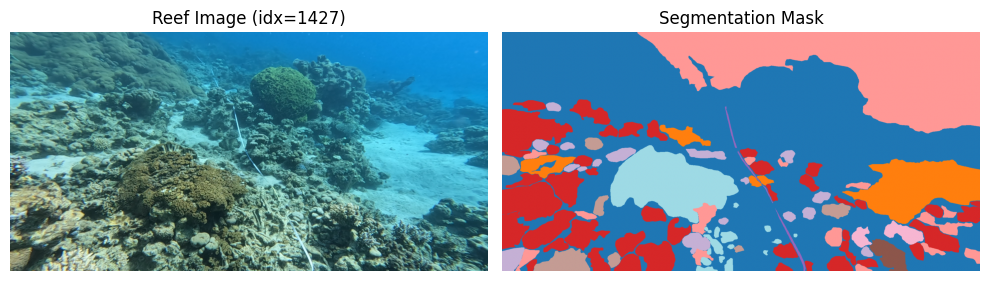


Pixel proportions for train example idx=1427
Class ID  0: 50.60%
Class ID 13: 16.67%
Class ID 12: 13.52%
Class ID  5:  5.76%
Class ID 36:  5.46%
Class ID 14:  2.10%
Class ID 17:  2.01%
Class ID 22:  1.79%
Class ID 25:  0.67%
Class ID 20:  0.64%
Class ID 37:  0.30%
Class ID 18:  0.25%
Class ID 15:  0.24%


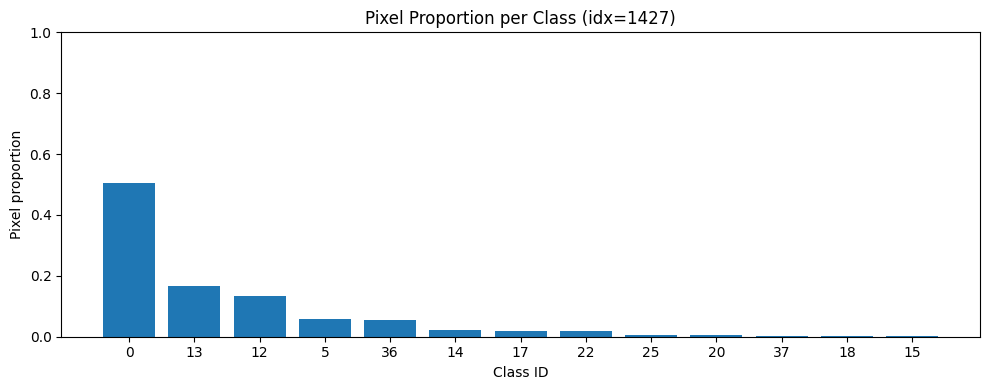

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

rand_df_num = random.randint(0, len(dataset["train"]) - 1)
example_row = dataset["train"][rand_df_num]
image = example_row["image"]
mask  = example_row["label"]

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title(f"Reef Image (idx={rand_df_num})")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap="tab20")   # int-coded classes → colored for visualization
plt.title("Segmentation Mask")
plt.axis("off")
plt.tight_layout()
plt.show()

mask_np = np.array(mask)                        # H x W integers
ids, counts = np.unique(mask_np, return_counts=True)
props = counts / counts.sum()                   # proportions in [0,1]

# sort by proportion (desc)
order = np.argsort(props)[::-1]
ids_sorted   = ids[order]
props_sorted = props[order]

# ID2NAME ex. sand
# labels = [f"{cid}: {ID2NAME.get(int(cid), 'unknown')}" for cid in ids_sorted]
labels = [str(int(cid)) for cid in ids_sorted]  # using IDs only

# print a small table
print(f"\nPixel proportions for train example idx={rand_df_num}")
for cid, p in zip(ids_sorted, props_sorted):
    print(f"Class ID {int(cid):>2}: {p:6.2%}")

# bar chart of proportions
plt.figure(figsize=(10,4))
plt.bar(labels, props_sorted)
plt.ylim(0, 1)
plt.ylabel("Pixel proportion")
plt.xlabel("Class ID")
plt.title(f"Pixel Proportion per Class (idx={rand_df_num})")
plt.tight_layout()
plt.show()


In [4]:
# Does every image have a corresponding mask?
# Do all images and masks have the same height and width?

for split in ['train','validation','test']:
    for i in dataset[split].select(range(10)):
        assert i['image'].size == i['label'].size

In [5]:
# Does every mask contain valid class IDs, from 0-38?

import numpy as np
mask = np.array(dataset["train"][[0,1,2,3,4,6,5,7,8]]["label"])
print(np.unique(mask))

[ 0  3  5  6  8  9 10 12 13 14 15 17 18 19 20 22 23 24 29 30 31 36 37 38
 39]


In [6]:
all_ids = set()
for split in ["train", "validation", "test"]:
    for ex in dataset[split].select(range(50)):  # check first 50 examples per split
        all_ids.update(np.unique(np.array(ex["label"])))
print("Observed class ID range:", min(all_ids), "to", max(all_ids))

Observed class ID range: 0 to 39


In [7]:
# # Goals: check if all ids present are all in range
# # check if certain ids are missing from any splits, 
# # possibly a total id make-up, cross-check w/ key

# valid_ids = set(range(40))
# counter = {}

# for split in ['train','test','validation']:
#     bad_ex_count = 0
#     for i, example in enumerate(dataset[split]):
#         mask = np.array(example['label'])
#         unique_ids = np.unique(mask)
#         if not set(unique_ids).issubset(valid_ids):
#             bad_ex_count += 1

#     counter[split] = bad_ex_count

# print(counter)


In [ ]:
# import numpy as np
# from collections import Counter, defaultdict

# # Initialize counters for each split
# split_counts = defaultdict(Counter)

# valid_ids = list(range(39))

# for split in ["train", "validation", "test"]:
#     print(f"Counting IDs in {split}...")
#     for example in dataset[split]:
#         mask = np.array(example["label"])
#         # Flatten and count each class ID in this mask
#         unique, counts = np.unique(mask, return_counts=True)
#         # Update the counter for this split
#         for u, c in zip(unique, counts):
#             split_counts[split][int(u)] += int(c)

# # Convert to readable output
# for split in split_counts:
#     print(f"\n=== {split.upper()} SPLIT ===")
#     for id_ in valid_ids:
#         print(f"ID {id_:>2}: {split_counts[split][id_]:>10,} pixels")


Counting IDs in train...
Counting IDs in validation...
Counting IDs in test...

=== TRAIN SPLIT ===
ID  0: 542,361,812 pixels
ID  1: 24,207,320 pixels
ID  2:  1,466,031 pixels
ID  3:  6,610,701 pixels
ID  4:  7,921,061 pixels
ID  5: 196,821,540 pixels
ID  6: 120,299,444 pixels
ID  7: 35,365,250 pixels
ID  8:  2,267,325 pixels
ID  9: 14,915,057 pixels
ID 10: 162,284,174 pixels
ID 11:  1,099,700 pixels
ID 12: 378,884,014 pixels
ID 13: 687,757,093 pixels
ID 14: 159,368,750 pixels
ID 15:  8,351,655 pixels
ID 16:  2,912,563 pixels
ID 17: 286,269,163 pixels
ID 18: 137,988,434 pixels
ID 19: 14,150,345 pixels
ID 20: 31,160,310 pixels
ID 21:  9,932,734 pixels
ID 22: 17,008,615 pixels
ID 23: 26,186,688 pixels
ID 24:    872,458 pixels
ID 25: 50,272,699 pixels
ID 26:  1,070,283 pixels
ID 27:  3,664,753 pixels
ID 28: 107,051,403 pixels
ID 29:  5,819,691 pixels
ID 30:  2,228,048 pixels
ID 31: 56,022,067 pixels
ID 32: 26,850,814 pixels
ID 33:  1,297,052 pixels
ID 34:  6,979,042 pixels
ID 35:    930,4

In [ ]:
# import pandas as pd

# # Convert counts into a DataFrame
# df = pd.DataFrame(split_counts).fillna(0).astype(int)

# output_path = r"C:\Users\anair26\OneDrive - Eastside Preparatory School\coral-reef-ml\coralscapes_id_counts.csv"
# df.to_csv(output_path)

In [ ]:
# metdata attempt 

from datasets import load_from_disk

# If you've already saved locally:
dataset = load_from_disk(r"C:\Users\anair26\OneDrive - Eastside Preparatory School\coral-health-classification\coralscapesdata")

# Show overall splits and feature schema
print(dataset)
print("\n=== Features in each example ===")
print(dataset["train"].features)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 1517
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 166
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 392
    })
})

=== Features in each example ===
{'image': Image(mode=None, decode=True), 'label': Image(mode=None, decode=True)}


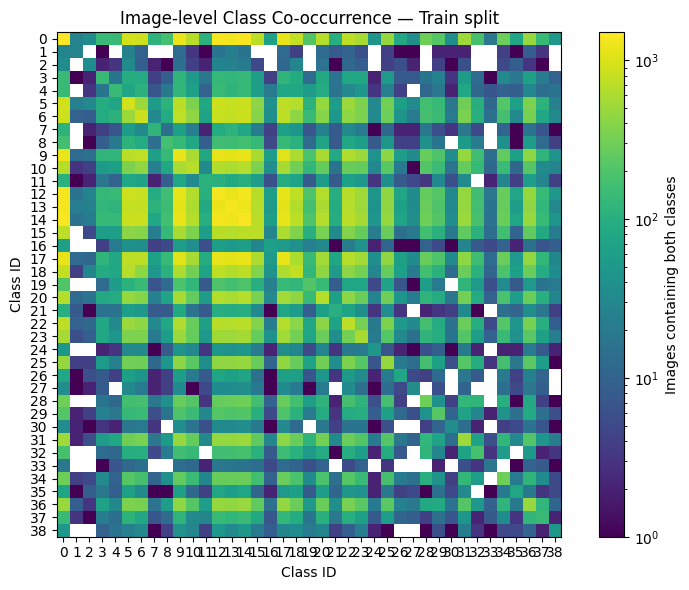

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

N_CLASSES = 39
SPLITS = ["train"]   # try ["train","validation","test"] or ["train"] first

ID2NAME = None
# ID2NAME ex. sand

split_mats = {}

for split in SPLITS:
    M = np.zeros((N_CLASSES, N_CLASSES), dtype=np.int64)

    for ex in dataset[split]:
        mask = np.array(ex["label"])
        ids = np.unique(mask)                         # classes present in this image
        ids = ids[(ids >= 0) & (ids < N_CLASSES)]     # safety clamp

        present = np.zeros(N_CLASSES, dtype=np.int8)
        present[ids.astype(int)] = 1                  # 1 if class appears in this image

        # outer product -> image-level co-occurrence (including diagonal)
        M += np.outer(present, present)

    split_mats[split] = M

for split, M in split_mats.items():
    plt.figure(figsize=(12,9))
    im = plt.imshow(M, norm=LogNorm(vmin=1, vmax=M.max()+1))  # log scale helps with imbalance
    plt.title(f"Image-level Class Co-occurrence — {split.capitalize()} split")
    plt.xlabel("Class ID")
    plt.ylabel("Class ID")
    plt.colorbar(im, label="Images containing both classes")

    # tick labels: IDs or names if provided
    if ID2NAME:
        labels = [ID2NAME.get(i, str(i)) for i in range(N_CLASSES)]
        plt.xticks(range(N_CLASSES), labels, rotation=90)
        plt.yticks(range(N_CLASSES), labels)
    else:
        plt.xticks(range(N_CLASSES))
        plt.yticks(range(N_CLASSES))

    plt.tight_layout()
    plt.show()



In [15]:
np.savetxt("coralscapes_coocc_train.csv", split_mats["train"], delimiter=",", fmt="%d")


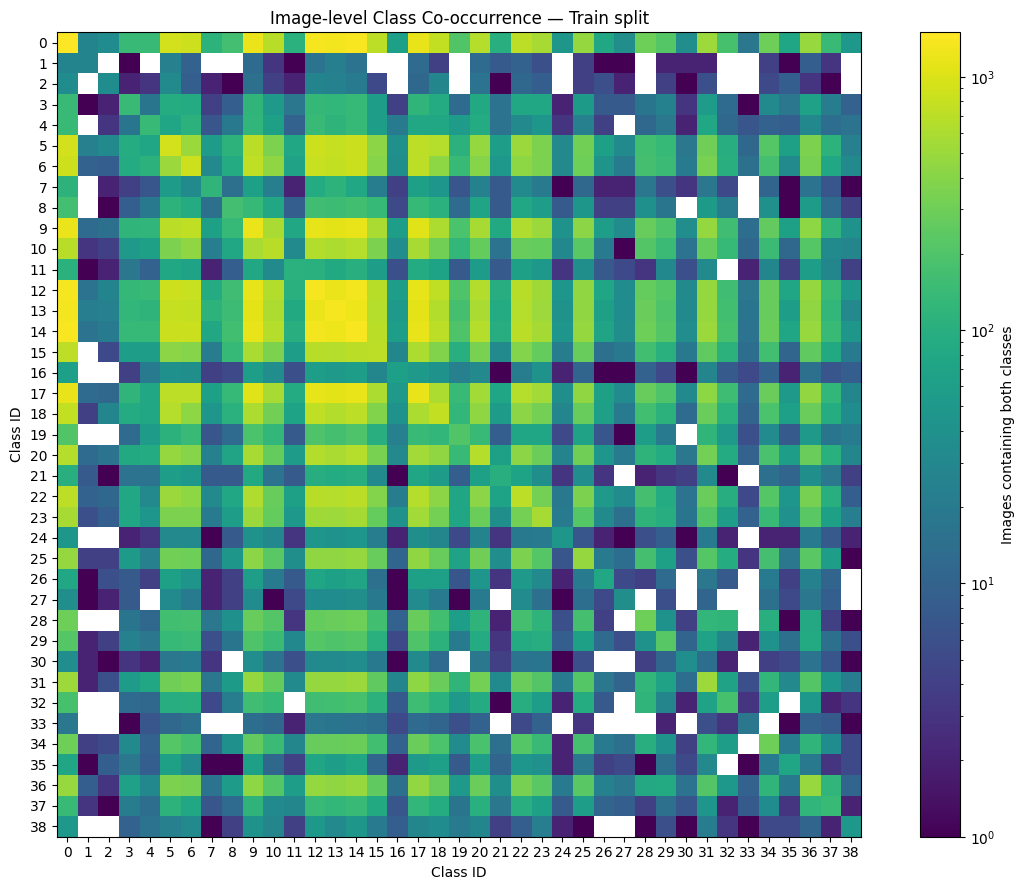

In [20]:
for split, M in split_mats.items():
    plt.figure(figsize=(12,9))
    im = plt.imshow(M, norm=LogNorm(vmin=1, vmax=M.max()+1))  # log scale helps with imbalance
    plt.title(f"Image-level Class Co-occurrence — {split.capitalize()} split")
    plt.xlabel("Class ID")
    plt.ylabel("Class ID")
    plt.colorbar(im, label="Images containing both classes")

    # tick labels: IDs or names if provided
    if ID2NAME:
        labels = [ID2NAME.get(i, str(i)) for i in range(N_CLASSES)]
        plt.xticks(range(N_CLASSES), labels, rotation=90)
        plt.yticks(range(N_CLASSES), labels)
    else:
        plt.xticks(range(N_CLASSES))
        plt.yticks(range(N_CLASSES))

    plt.tight_layout()
    plt.show()


   split  width  height     area
0  train   2048    1024  2097152
1  train   2048    1024  2097152
2  train   2048    1024  2097152
3  train   2048    1024  2097152
4  train   2048    1024  2097152


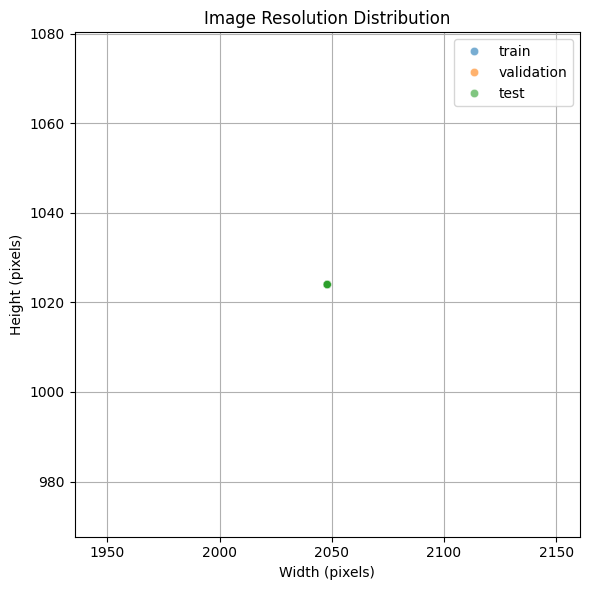

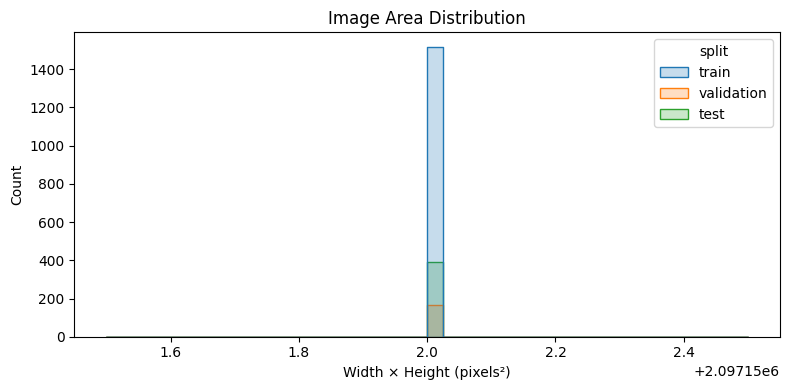


=== Image Size Summary ===
             width                                                       \
             count    mean  std     min     25%     50%     75%     max   
split                                                                     
test         392.0  2048.0  0.0  2048.0  2048.0  2048.0  2048.0  2048.0   
train       1517.0  2048.0  0.0  2048.0  2048.0  2048.0  2048.0  2048.0   
validation   166.0  2048.0  0.0  2048.0  2048.0  2048.0  2048.0  2048.0   

            height          ...                    area                  \
             count    mean  ...     75%     max   count       mean  std   
split                       ...                                           
test         392.0  1024.0  ...  1024.0  1024.0   392.0  2097152.0  0.0   
train       1517.0  1024.0  ...  1024.0  1024.0  1517.0  2097152.0  0.0   
validation   166.0  1024.0  ...  1024.0  1024.0   166.0  2097152.0  0.0   

                                                                   
  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sizes = []

for split in ["train", "validation", "test"]:
    for i, ex in enumerate(dataset[split]):
        w, h = ex["image"].size   # (width, height)
        sizes.append({
            "split": split,
            "width":  w,
            "height": h,
            "area":   w * h
        })

# Convert to DataFrame
df_sizes = pd.DataFrame(sizes)
print(df_sizes.head())

plt.figure(figsize=(6,6))
sns.scatterplot(
    data=df_sizes,
    x="width", y="height",
    hue="split", alpha=0.6
)
plt.title("Image Resolution Distribution")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(
    data=df_sizes,
    x="area", hue="split",
    bins=40, element="step", common_norm=False
)
plt.title("Image Area Distribution")
plt.xlabel("Width × Height (pixels²)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

summary = df_sizes.groupby("split")[["width", "height", "area"]].describe()
print("\n=== Image Size Summary ===")
print(summary)

output_path = r"C:\Users\anair26\OneDrive - Eastside Preparatory School\coral-health-classification\coralscapes_image_sizes.csv"
df_sizes.to_csv(output_path, index=False)
print(f"\n✅ Saved size stats to {output_path}")
